In [ ]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

from utilities_new_new import *

description = ["99_supercells", "81_supercells", "iso"]
data_subdir = [f"eFEX_all_entries"]
accept_data_filename = ["l1calo_topocluster_test_Zee.root"]
reject_data_filename = ["ZMUMU_TopoCluster_Supercell_Large.root"]
format_mode = ["SuperCell_ET", "reduced_SuperCell_ET", "iso_vars"]
equalised = [False]

classifier_name = "XGBClassifier"
binary_classifiers = import_all_classifiers()
clf = binary_classifiers[classifier_name]()


c:\Users\Me\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imported 43 binary classifiers:
['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV', 'CategoricalNB', 'ClassifierChain', 'ComplementNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'FixedThresholdClassifier', 'GaussianNB', 'GaussianProcessClassifier', 'GradientBoostingClassifier', 'HistGradientBoostingClassifier', 'KNeighborsClassifier', 'LabelPropagation', 'LabelSpreading', 'LinearDiscriminantAnalysis', 'LinearSVC', 'LogisticRegression', 'LogisticRegressionCV', 'MLPClassifier', 'MultiOutputClassifier', 'MultinomialNB', 'NearestCentroid', 'NuSVC', 'OneVsOneClassifier', 'OneVsRestClassifier', 'OutputCodeClassifier', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RadiusNeighborsClassifier', 'RandomForestClassifier', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'TunedThresholdClassifierCV', 'VotingClassifier', 'XGBClassifier']


  0%|          | 0/1 [00:00<?, ?it/s]


found preprepared data in ..\data\eFEX_all_entries_99_supercells_eqFalse


c:\Users\Me\Desktop\uni temp\Y5\Project\ATLAS2\ATLAS-L1-Trigger-Y4-Project\tertiary_tests\utilities_new_new.py:579: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


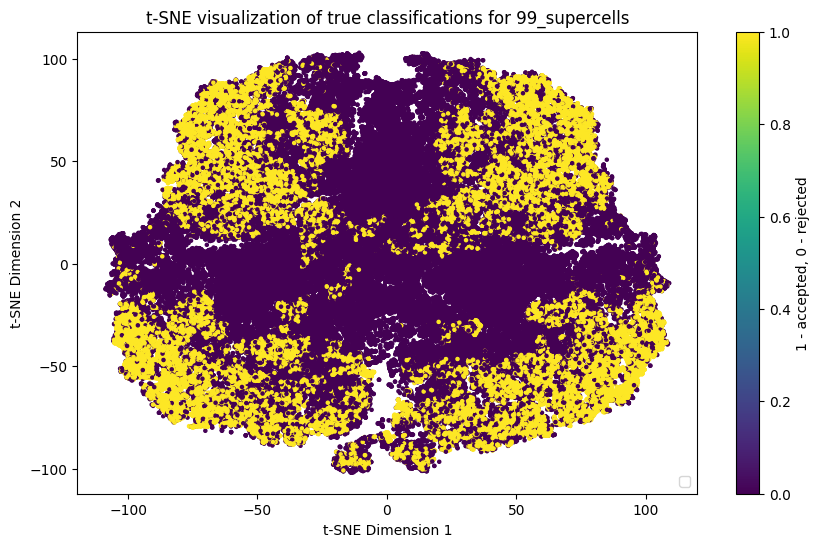

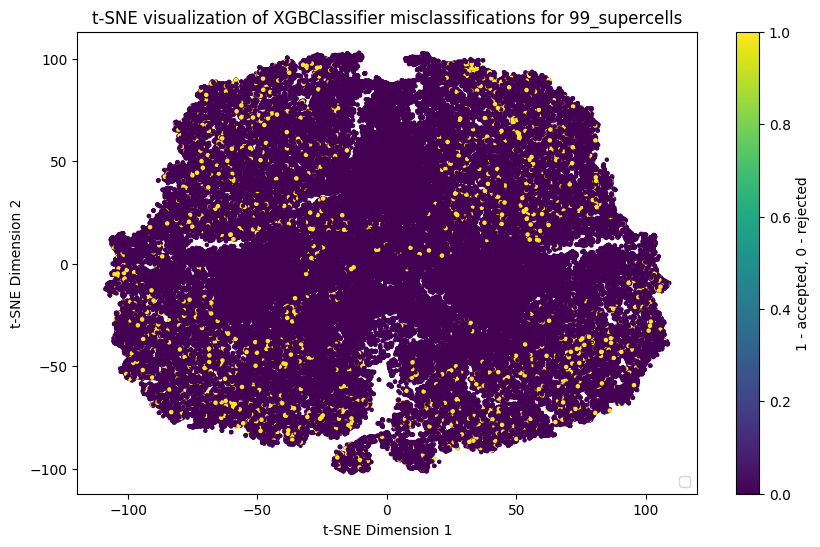


100%|██████████| 1/1 [16:08<00:00, 968.83s/it]



found preprepared data in ..\data\eFEX_all_entries_81_supercells_eqFalse


c:\Users\Me\Desktop\uni temp\Y5\Project\ATLAS2\ATLAS-L1-Trigger-Y4-Project\tertiary_tests\utilities_new_new.py:579: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


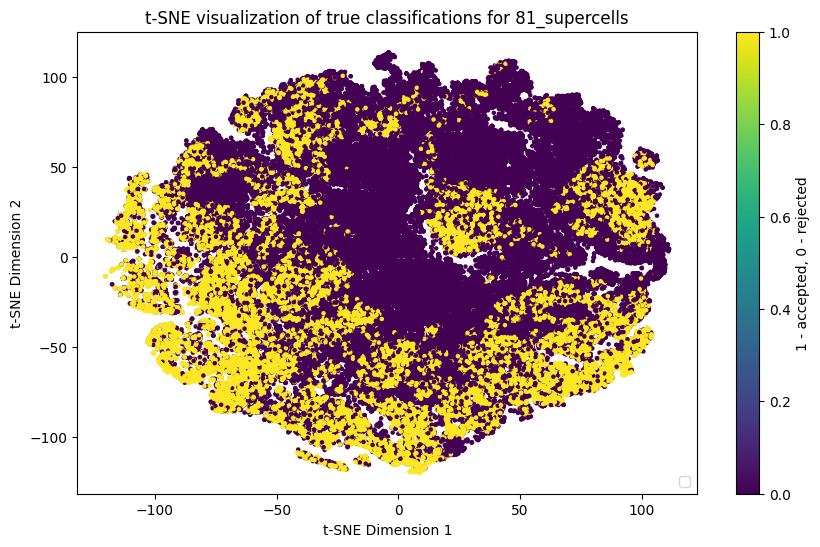

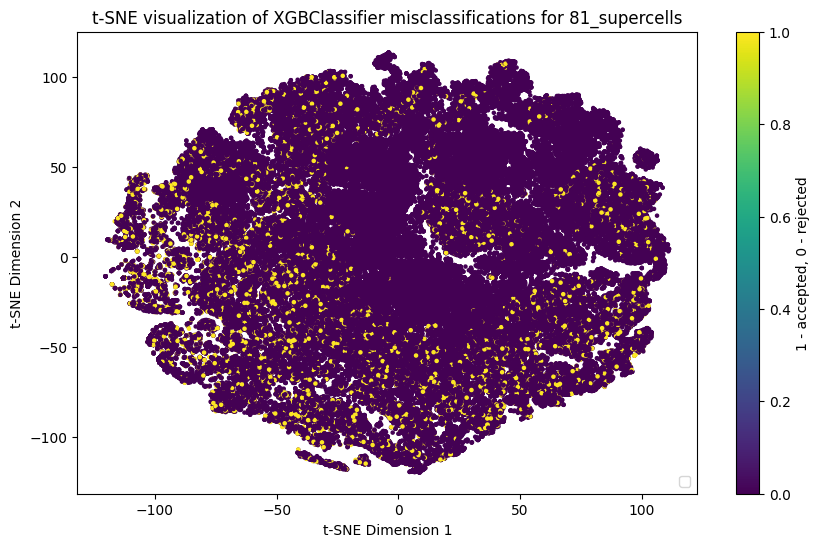


100%|██████████| 1/1 [15:43<00:00, 943.89s/it]



found preprepared data in ..\data\eFEX_all_entries_iso_eqFalse


c:\Users\Me\Desktop\uni temp\Y5\Project\ATLAS2\ATLAS-L1-Trigger-Y4-Project\tertiary_tests\utilities_new_new.py:579: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


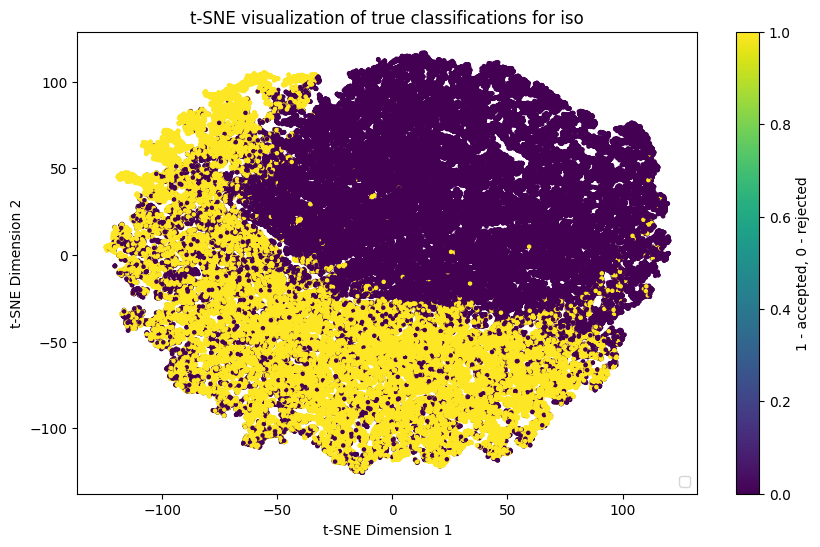

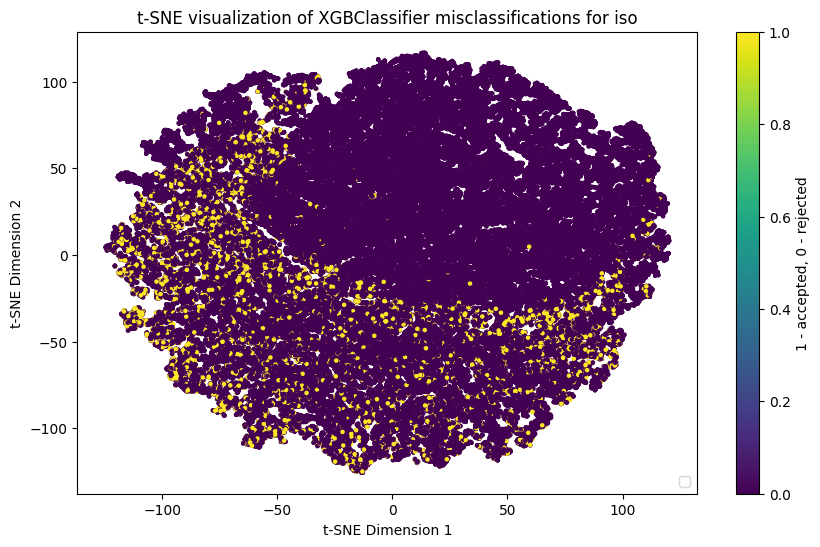


100%|██████████| 1/1 [47:34<00:00, 2854.26s/it]


In [2]:

for i in tqdm(range(len(data_subdir))):
    for j in tqdm(range(len(description))):
        for k in tqdm(range(len(equalised))):
            id = f"{data_subdir[i]}_{description[j]}_eq{equalised[k]}"
            ZB_rate_estimate_id = f"ZB_rate_estimation_{description[j]}"
            X_train, X_test, y_train, y_test, pd_passthrough_train, pd_passthrough_test = prepare_data(accept_data_filename = accept_data_filename[i], reject_data_filename = reject_data_filename[i], data_subdir = id, format_mode = format_mode[j], get_pT=True, equalised=equalised[k])
            X_test_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_test) 
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_fpfn = np.logical_xor(y_test, y_pred)
            plot_2D_TSNE(X_test_embedded,y_test, f"t-SNE visualization of true classifications for {description[j]}")
            plot_2D_TSNE(X_test_embedded,y_fpfn, f"t-SNE visualization of {classifier_name} misclassifications for {description[j]}")

